In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import uncertainty_wizard as uwiz
from sklearn.model_selection import train_test_split


Training data:        (56000, 28, 28)
Training solution:    (56000,)
Test data:            (14000, 28, 28)
Test solution:        (14000,)


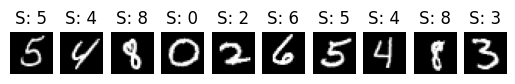

Training data:        (56000, 28, 28, 1)
Training solution:    (56000, 10)
Test data:            (14000, 28, 28, 1)
Test solution:        (14000, 10)


In [4]:
# LOAD
data = pd.read_csv('mnist.csv')
x_all = data.drop('solution', axis=1).values
y_all = data['solution'].values

# RESHAPE
x_all_fixed = x_all.reshape(-1, 28, 28)

# SPLIT
x_train, x_test, y_train, y_test = train_test_split(x_all_fixed, y_all, test_size=0.2, random_state=42)


print("Training data:       ", x_train.shape)
print("Training solution:   ", y_train.shape)
print("Test data:           ", x_test.shape)
print("Test solution:       ", y_test.shape)

fig, axes = plt.subplots(1, 10)
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray', vmin=0, vmax=255)
    axes[i].set_title(f"S: {y_train[i]}")
    axes[i].axis('off')
plt.show()

x_train = (x_train.astype('float32') / 255).reshape(x_train.shape[0], 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
x_test = (x_test.astype('float32') / 255).reshape(x_test.shape[0], 28, 28, 1)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)      #??????????

print("Training data:       ", x_train.shape)
print("Training solution:   ", y_train.shape)
print("Test data:           ", x_test.shape)
print("Test solution:       ", y_test.shape)

COMPILING...
FIT...
26/26 [==============================] - 34s 1s/step - loss: 2.3008 - accuracy: 0.0956 - val_loss: 2.2981 - val_accuracy: 0.0941
PLOT...


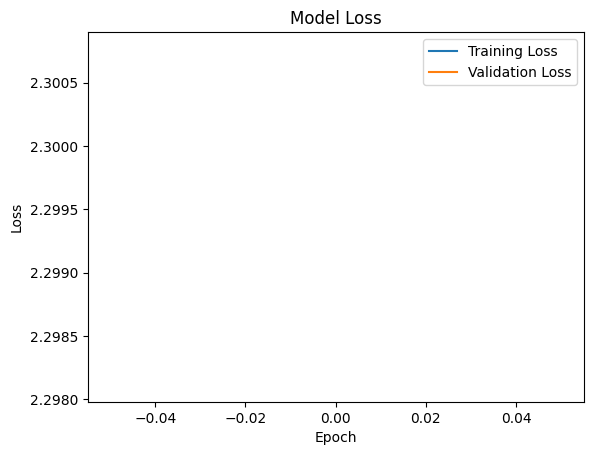

In [11]:
model = tf.keras.models.load_model('model_settings', compile=False)


# COMPILE
print("COMPILING...")
model.compile(loss      = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adadelta(),
              metrics   = ['accuracy'])


# FIT
print("FIT...")
model_info = model.fit(x_train, y_train, 
                       validation_split = 0.1, 
                       batch_size       = 2000, 
                       epochs           = 1,
                       verbose          = 1, 
                       callbacks        = [tf.keras.callbacks.EarlyStopping(patience=2)])


# PLOT
print("PLOT...")
plt.plot(model_info.history['loss'], label='Training Loss')
plt.plot(model_info.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Uncertainty Wizard
* Uncertainty Wizard sequential has same function as Keras sequential, but is specially made to handle uncertainty.

epochs

Layers Conv2D
* Convolutional layer that use the number of filter with different sizes to find different value from edges, corners and so on.

Layers MaxPooling2D
* Make the data more robust by splitting the 2d-block data and only keeping the highest value from each part.

Layers Dropout
* Prevent overfitting by having 50% droprate of unit during the traning of the model. It will help out with learn redundant learning and make the progress more robust.

Layers Flatten
* Flatten it out from 2D array to a 1D array.
* Doesn't affect batch size.

Layer Dense


7/7 [==============================] - 1s 171ms/step
(14000, 28, 28, 1)


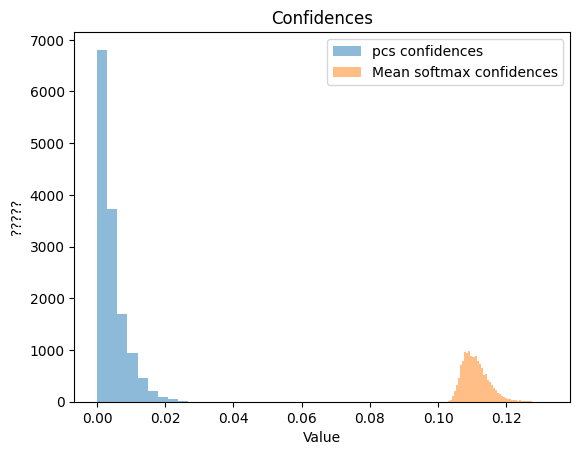

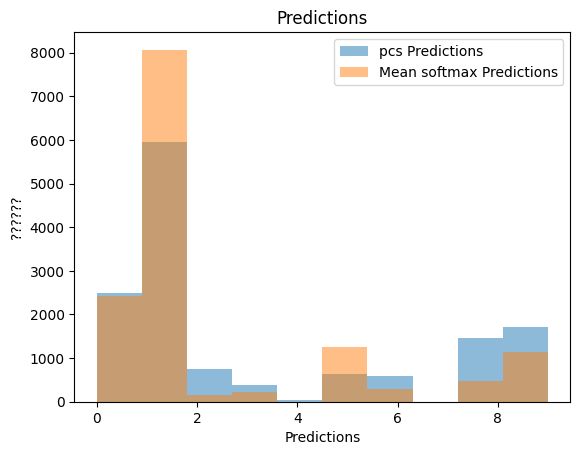

In [ ]:
quantifiers = ['pcs', 'mean_softmax']
results = model.predict_quantified(x_test,
                                   quantifier=quantifiers,
                                   batch_size=2000,
                                   sample_size=32,
                                   verbose=1)

print(x_test.shape)
pcs_predictions = results[0][0]
pcs_confidences = results[0][1]
mean_softmax_predictions = results[1][0]
mean_softmax_confidences = results[1][1]

plt.hist(pcs_confidences, alpha=0.5, label='pcs confidences')
plt.hist(mean_softmax_confidences, alpha=0.5, label='Mean softmax confidences')
plt.xlabel('Value')
plt.ylabel('?????')
plt.title('Confidences')
plt.legend()
plt.show()

plt.hist(pcs_predictions, alpha=0.5, label='pcs Predictions')
plt.hist(mean_softmax_predictions, alpha=0.5, label='Mean softmax Predictions')
plt.xlabel('Predictions')
plt.ylabel('??????')
plt.title('Predictions')
plt.legend()
plt.show()

In [ ]:
test_results = results[0][0]
with open('Archive.txt', 'w') as file:
    file.write(str(test_results))